## Kamran Ashraf


# Data Analysis Project

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv("Data Science jobs.csv")

In [29]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary',
       'employee_residence', 'experience_level', 'employment_type',
       'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [30]:
specific_columns = ["job_title" , "salary" , "company_size"]
sd = df[specific_columns]
sd.head()

,job_title,salary,company_size
0,Machine Learning Engineer,186597.0,L
1,Statistician,110630.0,M
2,Machine Learning Engineer,61280.0,L
3,Data Analyst,154130.0,L
4,Statistician,172312.0,S


In [31]:
sd.columns

Index(['job_title', 'salary', 'company_size'], dtype='object')

In [32]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   job_title     1506 non-null   object 
 1   salary        1489 non-null   float64
 2   company_size  1337 non-null   object 
dtypes: float64(1), object(2)
memory usage: 35.4+ KB


In [33]:
df.isnull()

,work_year,job_title,job_category,salary,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1501,False,False,True,True,False,True,False,False,False,True
1502,False,False,False,False,False,False,False,False,False,False
1503,False,False,False,False,False,False,False,False,False,False
1504,False,False,False,False,False,False,False,False,False,False


In [34]:
sd.isnull().sum()

job_title         0
salary           17
company_size    169
dtype: int64

In [35]:
sd['salary'] = sd['salary'].fillna(sd['salary'].median())
sd['company_size'] = sd['company_size'].fillna(sd['company_size'].mode()[0])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18444\136855672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd['salary'] = sd['salary'].fillna(sd['salary'].median())
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18444\136855672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd['company_size'] = sd['company_size'].fillna(sd['company_size'].mode()[0])


In [36]:
sd.isnull().sum()

job_title       0
salary          0
company_size    0
dtype: int64

In [38]:
sd.describe()

,salary
count,1506.000000
mean,114024.361886
std,48860.029346
min,30018.000000
25%,72125.250000
50%,115411.000000
75%,155715.000000
max,199563.000000


In [39]:
sd.describe(include="all")

,job_title,salary,company_size
count,1506,1506.000000,1506
unique,5,NaN,3
top,Data Analyst,NaN,L
freq,314,NaN,630
mean,NaN,114024.361886,NaN
std,NaN,48860.029346,NaN
min,NaN,30018.000000,NaN
25%,NaN,72125.250000,NaN
50%,NaN,115411.000000,NaN
75%,NaN,155715.000000,NaN


In [40]:
bin_edges = [0, 60000, 100000, 160000,float('inf')] 
bin_labels = ['0-60k', '60k-100k', '100k-160k', '160k+']


In [41]:
sd["salary_bins"] = pd.cut(sd["salary"], bins=bin_edges, labels=bin_labels, include_lowest=True)
print(sd[["salary", "salary_bins"]].head())

     salary salary_bins
0  186597.0       160k+
1  110630.0   100k-160k
2   61280.0    60k-100k
3  154130.0   100k-160k
4  172312.0       160k+


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18444\1795905107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd["salary_bins"] = pd.cut(sd["salary"], bins=bin_edges, labels=bin_labels, include_lowest=True)


In [42]:
salary_counts = sd['salary_bins'].value_counts().sort_index()
salary_counts

salary_bins
0-60k        271
60k-100k     363
100k-160k    529
160k+        343
Name: count, dtype: int64

<Axes: title={'center': 'Salary Distribution'}, xlabel='Salary Ranges', ylabel='Number of Employees'>

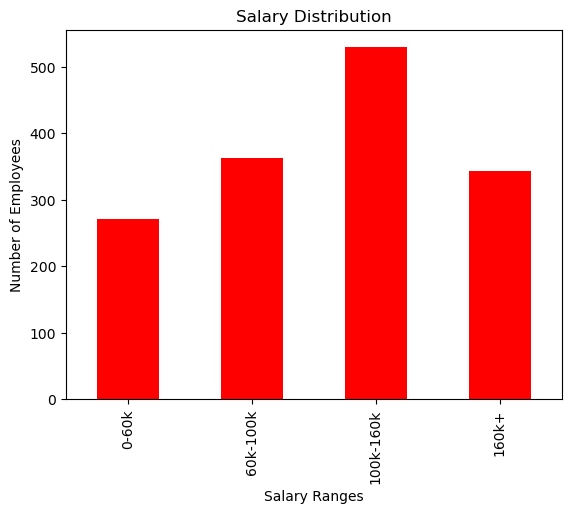

In [43]:
salary_counts.plot(kind='bar', color='red', title='Salary Distribution', ylabel='Number of Employees', xlabel='Salary Ranges')

In [44]:
sd["salary_bins"]

0           160k+
1       100k-160k
2        60k-100k
3       100k-160k
4           160k+
          ...    
1501    100k-160k
1502    100k-160k
1503    100k-160k
1504     60k-100k
1505    100k-160k
Name: salary_bins, Length: 1506, dtype: category
Categories (4, object): ['0-60k' < '60k-100k' < '100k-160k' < '160k+']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18444\4095757946.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_company_size_job_counts = sd.groupby(['salary_bins', 'company_size', 'job_title']).size().unstack(fill_value=0)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18444\4095757946.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  axis.figure.show()


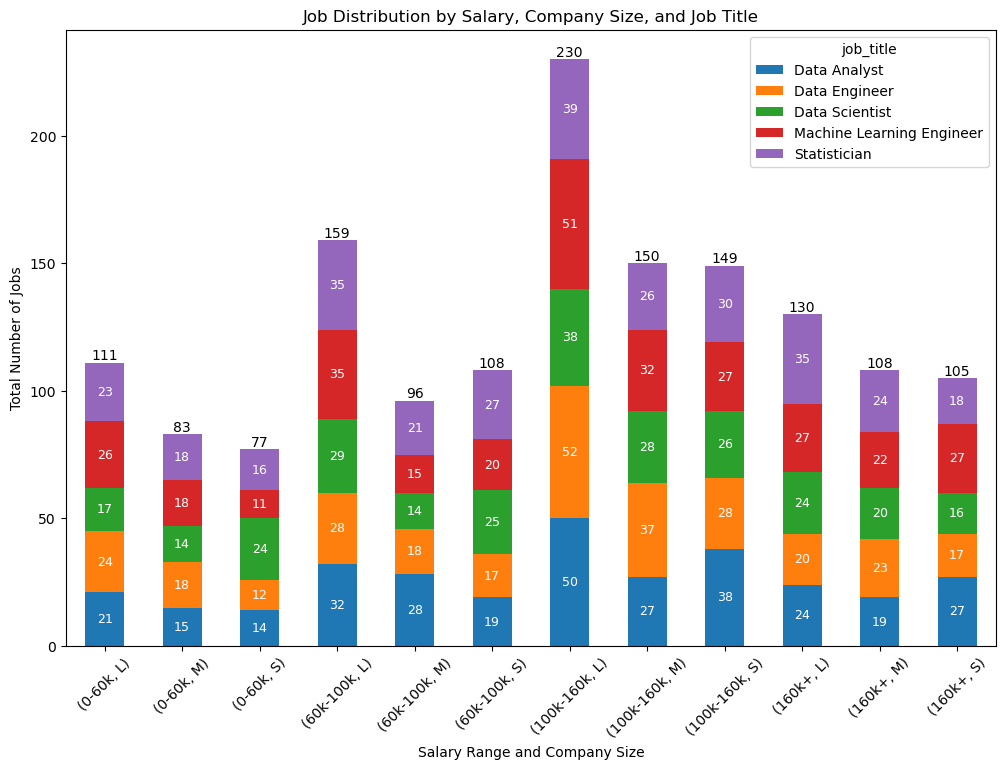

In [45]:

salary_company_size_job_counts = sd.groupby(['salary_bins', 'company_size', 'job_title']).size().unstack(fill_value=0)


axis = salary_company_size_job_counts.plot(kind='bar', stacked=True, figsize=(12, 8), legend=True)


axis.set_title("Job Distribution by Salary, Company Size, and Job Title")
axis.set_xlabel("Salary Range and Company Size")
axis.set_ylabel("Total Number of Jobs")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)


for bar in axis.patches:
    height = bar.get_height()  
    if height > 0:  
        axis.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_y() + height / 2,  
            int(height),  
            ha='center', va='center', fontsize=9, color='white'  
        )

total_jobs = salary_company_size_job_counts.sum(axis=1)
for i, total in enumerate(total_jobs):
    axis.text(
        i,  
        total , 
        int(total),  
        ha='center', va='bottom', fontsize=10, color='black'
    )

axis.figure.show()
